1.1 -----------------------------
The top 20 countries:
1 	CHINA	2075019.0
2 	TURKEY	1134569.0
3 	IRAN	1011446.0
4 	ITALY	498477.0
5 	SYRIA	439224.0
6 	HAITI	323474.0
7 	AZERBAIJAN	317219.0
8 	JAPAN	278142.0
9 	ARMENIA	191890.0
10 	PAKISTAN	145083.0
11 	IRAQ	136200.0
12 	ECUADOR	135479.0
13 	TURKMENISTAN	117412.0
14 	PERU	102219.0
15 	ISRAEL	90388.0
16 	PORTUGAL	83531.0
17 	GREECE	79174.0
18 	CHILE	64276.0
19 	INDIA	63491.0
20 	TAIWAN	57135.0
1.2 -----------------------------


C:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


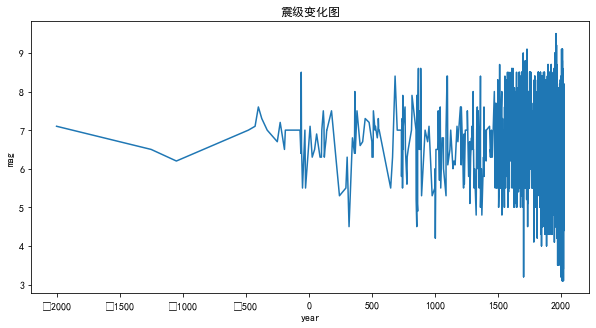

1.3 -----------------------------
                 国家  地震总次数             最大地震的日期  \
5             ITALY      8   1915/1/13 6:52:38   
68        INDONESIA      6  2004/12/26 0:58:53   
72           TAIWAN      6    1920/6/5 4:21:28   
73           CANADA      5    1949/8/22 4:1:12   
8             INDIA      5   1950/8/15 14:9:30   
..              ...    ...                 ...   
99         BARBADOS      0                       
96          GRENADA      0                       
50          IRELAND      0                       
91   CANARY ISLANDS      0                       
113      MONTSERRAT      0                       

                                         最大地震的地点  
5             ITALY:  MARSICA, AVEZZANO, ABRUZZI  
68   INDONESIA:  SUMATRA:  ACEH:  OFF WEST COAST  
72                                        TAIWAN  
73              CANADA:  QUEEN CHARLOTTE ISLANDS  
8                                    INDIA-CHINA  
..                                           ...  
99      

In [2]:
#1 这一题温晓然教我思路方法
import pandas as pd
import matplotlib.pyplot as plt

# 1.1 -----------------------------
# 将tsv文件读作Sig_Eqs对象
print("1.1 -----------------------------")
Sig_Eqs = pd.read_csv("earthquakes-2022-10-31_19-00-23_+0800.tsv", delimiter = '\t')

# 获取国家列和死亡人数列
cols = Sig_Eqs[['Country','Deaths']]
cols = cols.fillna(0) # 填补空值
val = cols.iloc[1:,:].values # 去掉第一行空行，返回数组

deaths = {} # 创建字典
for i in range(len(val)):
    country_name = val[i][0]
    deaths[country_name] = deaths.get(country_name, 0) + val[i][1]

# 以第1列（死亡总数）为依据排序
res = sorted(deaths.items(), key=lambda x: x[1],reverse=True)

# 输出前20
print('The top 20 countries:')
for i in range(20):
    print(i+1, '\t{0}\t{1}'.format(res[i][0],res[i][1]))

# 1.2 --------------------------------
print("1.2 -----------------------------")
colsYM = Sig_Eqs[['Year', 'Mag']]
colsYM = colsYM[colsYM['Mag'] > 3]
year = colsYM.iloc[1:,0].values
mag = colsYM.iloc[1:,1].values

fig=plt.figure(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['SimHei'] # 使图例显示为中文黑体
plt.plot(year,mag, ls='-')
plt.title('震级变化图')
plt.xlabel('year')
plt.ylabel('mag')
plt.show()

# 1.3 ----------------------------------
# (1)给定国家自公元前215o年以来的地震总数
# (2)该国有史以来最大地震发生的日期和地点
print("1.3 -----------------------------")

cols3 = Sig_Eqs[['Country','Mag','Location Name','Year','Mo','Dy','Hr','Mn','Sec']]
cols3 = cols3.fillna(0)
val3 = cols3.iloc[1:, :].values

def CountEq_LargestEq(input):
    # 获取最大值
    c = 0
    location = ''
    date = ''
    num = 0
    for i in range(len(val3)):
        if val3[i][0] == input:
            if val3[i][1] > c:
                c = val3[i][1]
                location = val3[i][2]
                date = str(int(val3[i][3])) + "/" + str(int(val3[i][4])) + "/" + str(int(val3[i][5])) + " " + str(int(val3[i][6])) + ":" + str(int(val3[i][7])) + ":" + str(int(val3[i][8]))
                num = num + 1
    return num, date, location

country_nd = [] # 存储不重复的国家名
for i in range(len(val3)):
    if val3[i][0] in country_nd:
        continue
    else:
        country_nd.append(val3[i][0])

# 依次调用函数，传入所有国家
num = []
date = []
location = []

for c in country_nd:
    res_CL = CountEq_LargestEq(c)
    num.append(res_CL[0])
    date.append(res_CL[1])
    location.append(res_CL[2])

df3 = pd.DataFrame({'国家':country_nd, '地震总次数':num, '最大地震的日期':date, '最大地震的地点':location})
df3 = df3.sort_values(by=['地震总次数'],ascending=False)
# df3.to_csv("output.csv",index=False,encoding='GBK')
print(df3)



C:\Users\dell\AppData\Local\Temp\ipykernel_16628\3554481891.py:5: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baoan_Weather_1998_2022.csv')


0         18.6
1         22.0
2         24.0
3         22.1
4         24.0
          ... 
235669    21.0
235670    20.1
235671    20.0
235672    20.0
235673    20.0
Name: TMP, Length: 235674, dtype: float64
               TMP
DATE              
1998-01  15.233447
1998-02  16.875304
1998-03  19.971246
1998-04  25.228365
1998-05  27.098454
...            ...
2022-06  27.971803
2022-07  30.005550
2022-08  28.919057
2022-09  29.866772
2022-10  28.035110

[298 rows x 1 columns]


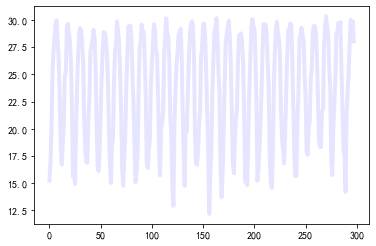

In [10]:
#2
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Baoan_Weather_1998_2022.csv')
df=df[['DATE','TMP']]
df = df.astype({'TMP':'string'})
df=df[df['TMP'].str.contains(',')]
a = []
for i in df['TMP']:
    j = i.split(',', 1)
    a.append(int(j[0])/10)

df['DATE'] = pd.to_datetime(df['DATE'])
df['TMP'] = a
print(df['TMP'])
df=df[(df['TMP'].between(-70,70,'both'))]  #一位网友教我数据筛选
df1= df.set_index(df['DATE'],drop=True)        #设置日期为索引,并删除原来的日期列
df_m=df1.resample('M').mean().to_period('M')
print(df_m)

#绘图命令
plt.plot(range(len(df_m)), df_m['TMP'], lw=4, ls='-', c='b', alpha=0.1)
plt.plot()
#show出图形
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14236\2752024157.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


<AxesSubplot:xlabel='LON', ylabel='LAT'>

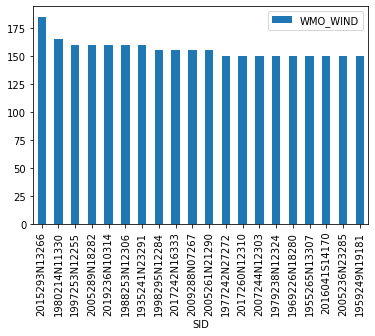

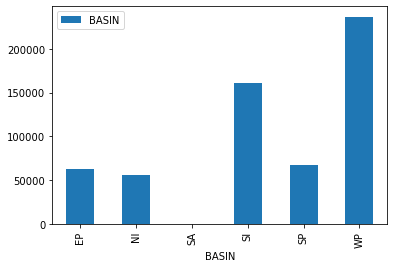

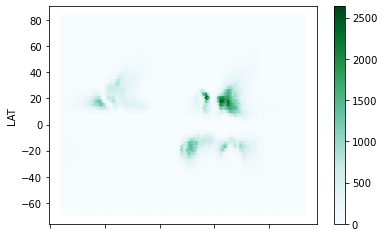

In [8]:
#3.1  网友卢弘毅教我这题主要思路，函数定义。
import pandas as pd
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()
wind = df['WMO_WIND'].fillna(0)
wind[wind==' ']=0
wind[wind!=0]
df['WMO_WIND']=wind
df['WMO_WIND']=pd.to_numeric(df['WMO_WIND'])
gdf = df.groupby('SID').agg({'WMO_WIND':'max'}).sort_values(by='WMO_WIND',ascending=False)
gdf.head(10)
#3.2
plot_df = df.groupby('SID').agg({'WMO_WIND':'max'}).sort_values(by='WMO_WIND',ascending=False).head(20)
plot_df.plot.bar()
#3.3
df.groupby("BASIN").agg({'BASIN':'count'}).plot.bar()
#3.4
df.plot.hexbin(x="LON",y='LAT',C=None)

<AxesSubplot:xlabel='LON', ylabel='LAT'>

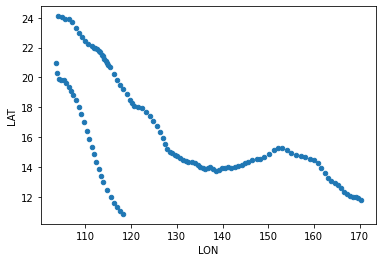

In [9]:
#3.5
df[df['NAME']=='MANGKHUT'].plot.scatter(x="LON",y="LAT")

<AxesSubplot:xlabel='ISO_TIME'>

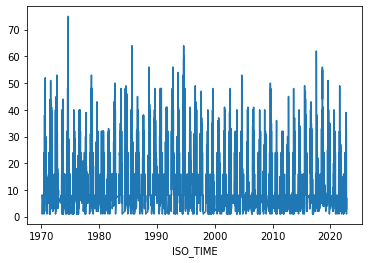

In [14]:
#3.6 3.7
df = df[((df['BASIN']=='WP') | (df['BASIN']=='EP')) & (df['SEASON']>=1970)]
df.head()
df.groupby([df['ISO_TIME'].dt.date]).count()['NUMBER'].plot()

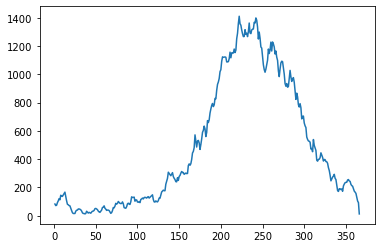

In [15]:
# 3.8 
#没理解题目，洪悦告诉我day of year指的是这一天是在一年中的第几天，
#所以3这题是先归并计算一年中某一天历史上所有数据记录的总数，然后再进行气候分析
import matplotlib.pyplot as plt
df["DAY_OF_YEAR"] = df["ISO_TIME"].dt.day_of_year
data_point_counts = df.groupby(["DAY_OF_YEAR"]).size()
plt.plot(data_point_counts)
# Then alaysis the climatology of data_point_counts

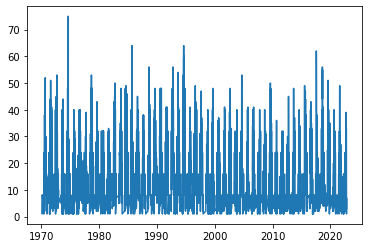

In [16]:
#3.9
# Data from climatology??感觉是统计历史线上每一天的数据，然后套专业公式计算异常值，按date归并（洪悦指导）
df["DATE"] = df["ISO_TIME"].dt.date
daily_counts = df.groupby(["DATE"]).size()
plt.plot(daily_counts)
# Then analysis anomaly

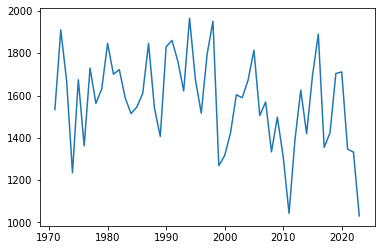

In [17]:
# 3.10
# Data from anomaly 洪悦告诉我用resample('Y')
daily_counts = df.groupby(["ISO_TIME"]).size()
sampling_data = daily_counts.resample('Y').size()
plt.plot(sampling_data)

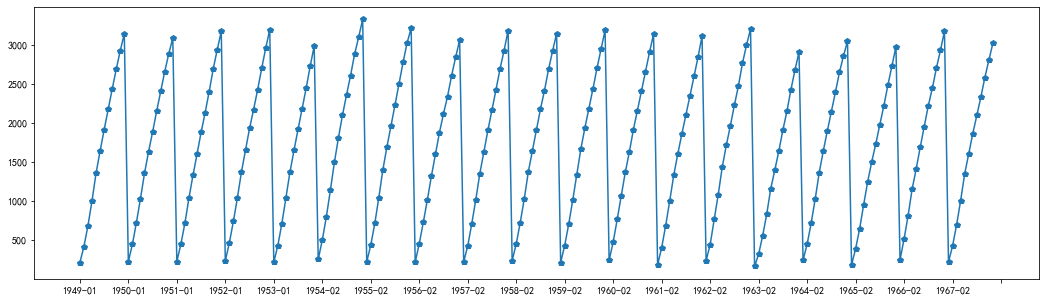

统计以下变量信息:
每年的最大月最高气温:{'1949': 35.11, '1950': 34.11, '1951': 34.59, '1952': 34.38, '1953': 34.76, '1954': 35.24, '1955': 34.82, '1956': 32.11, '1957': 34.22, '1958': 33.86, '1959': 33.93, '1960': 32.83, '1961': 33.5, '1962': 34.38, '1963': 33.81, '1964': 33.92, '1965': 33.65, '1966': 34.48, '1967': 33.99}
每年的最小月最低气温:{'1949': 20.0, '1950': 20.21, '1951': 20.54, '1952': 20.97, '1953': 20.25, '1954': 21.52, '1955': 20.45, '1956': 21.46, '1957': 21.02, '1958': 21.53, '1959': 20.98, '1960': 21.88, '1961': 19.93, '1962': 20.67, '1963': 19.33, '1964': 20.54, '1965': 19.55, '1966': 21.78, '1967': 21.11}
每年的最大月平均气温:{'1949': 29.75, '1950': 28.87, '1951': 29.05, '1952': 29.01, '1953': 29.43, '1954': 29.92, '1955': 29.83, '1956': 28.12, '1957': 29.14, '1958': 29.42, '1959': 29.32, '1960': 28.76, '1961': 28.98, '1962': 29.7, '1963': 29.0, '1964': 29.28, '1965': 28.67, '1966': 29.69, '1967': 29.36}
每年的最小月平均气温:{'1949': 25.02, '1950': 24.88, '1951': 25.49, '1952': 25.71, '1953': 25.2, '1954': 25.62, '1

In [11]:
#4 选择了一个数据关于Number days with greater than 0.91 inch(0.25mm)of precipitation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 4.1
def get_data():  
    file = pd.read_csv('RPW00041207.csv')
    file = np.array(file)
    # print(file.shape)

    bool = pd.notnull(file)

    new_file = []
    for index, line_bool in enumerate(bool):
        # print(sum(line_bool[:26]))
        if sum(line_bool[:26]) >= 26:
            new_file.append(file[index, :])

    return np.array(new_file)

# 4.2
def huitu(file):  
    x = file[:, 1]
    y = file[:, 6]
    fig = plt.figure(figsize=(18, 5))

    plt.plot(x, y, 'p-')
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(12))
    plt.show()

 # 4.3
def T_attributes(): 
    file = pd.read_csv('RPW00041207.csv')
    file = np.array(file)
    length = file.shape[0]

    useful_data = file[:, 1].reshape(length, 1)
    for i in [52, 54, 56]:
        useful_data = np.hstack((useful_data, file[:, i].reshape(length, 1)))

    date = []
    for i in useful_data[:, 0]:
        data = i.split('-')
        date.append(data)
    date = np.array(date)
    # print(date)

    years = np.unique(date[:, 0])

    highest_month_max_t = {}  # 每年的最大月最高气温
    for y in years:
        for idx, i in enumerate(date):
            if i[0] == y:
                if y not in highest_month_max_t.keys():
                    highest_month_max_t[y] = -10000

                t = float(useful_data[idx, 2])
                if t > highest_month_max_t[y]:
                    highest_month_max_t[y] = t

    lowest_month_min_t = {}  # 每年的最小月最低气温
    for y in years:
        for idx, i in enumerate(date):
            if i[0] == y:
                if y not in lowest_month_min_t.keys():
                    lowest_month_min_t[y] = 10000

                t = float(useful_data[idx, 3])
                if t < lowest_month_min_t[y]:
                    lowest_month_min_t[y] = t

    max_month_ave_t = {}  # 每年的最大月平均气温
    for y in years:
        for idx, i in enumerate(date):
            if i[0] == y:
                if y not in max_month_ave_t.keys():
                    max_month_ave_t[y] = -10000

                t = float(useful_data[idx, 1])
                if t > max_month_ave_t[y]:
                    max_month_ave_t[y] = t

    min_month_ave_t = {}  # 每年的最小月平均气温
    for y in years:
        for idx, i in enumerate(date):
            if i[0] == y:
                if y not in min_month_ave_t.keys():
                    min_month_ave_t[y] = 10000

                t = float(useful_data[idx, 1])
                if t < min_month_ave_t[y]:
                    min_month_ave_t[y] = t

    year_ave_t = {}  # 年平均气温
    for y in years:
        sum = 0
        month = 0
        for idx, i in enumerate(date):
            if i[0] == y:
                if y not in year_ave_t.keys():
                    year_ave_t[y] = 0
                t = float(useful_data[idx, 1])
                sum += t
                month += 1
        year_ave_t[y] = round(sum / month, 3)

    return highest_month_max_t, lowest_month_min_t, max_month_ave_t, min_month_ave_t, year_ave_t


if __name__ == '__main__':
    file = get_data()
    huitu(file)

    p1, p2, p3, p4, p5 = T_attributes()
    print('统计以下变量信息:')
    print("每年的最大月最高气温:{}".format(p1))
    print("每年的最小月最低气温:{}".format(p2))
    print("每年的最大月平均气温:{}".format(p3))
    print("每年的最小月平均气温:{}".format(p4))
    print("年平均气温:{}".format(p5))
    
#每年温度最高值在1949-1967年之间波动变化，年平均气温波动幅度不大，较为稳定。